In [32]:
!pip install fbprophet

In [34]:
from fbprophet import Prophet

In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('transactions.csv')

In [23]:
df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [24]:
df. drop("store_nbr", axis=1, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   transactions  83488 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [27]:
df['date'] = pd.to_datetime(df['date'])

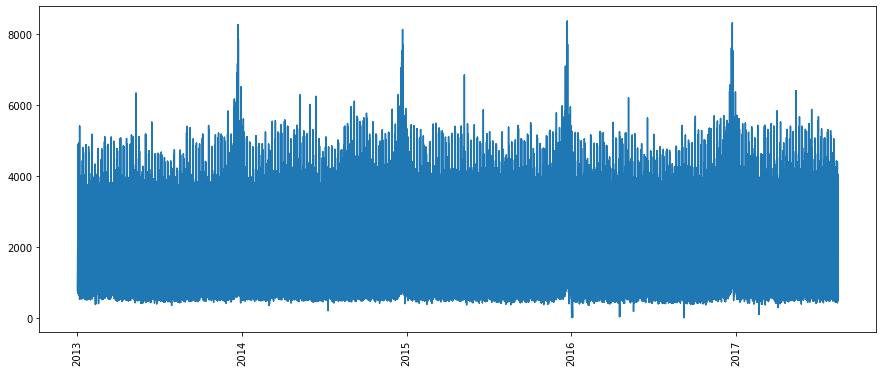

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(df['date'],df['transactions'])
plt.xticks(rotation='vertical')
plt.show()

In [35]:
m = Prophet()
df.columns = ['ds','y']

In [36]:
model = m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
future = m.make_future_dataframe(periods=1553,freq='D')
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3230,2021-11-11,1978.717349,473.038039,3016.347081,1603.306390,2318.955712,-164.226697,-164.226697,-164.226697,-143.612382,-143.612382,-143.612382,-20.614315,-20.614315,-20.614315,0.0,0.0,0.0,1814.490652
3231,2021-11-12,1978.897079,683.106746,3176.599904,1603.056549,2319.362417,-59.778424,-59.778424,-59.778424,-39.461207,-39.461207,-39.461207,-20.317217,-20.317217,-20.317217,0.0,0.0,0.0,1919.118655
3232,2021-11-13,1979.076808,856.733408,3388.616662,1602.806708,2319.769121,234.157635,234.157635,234.157635,255.918278,255.918278,255.918278,-21.760643,-21.760643,-21.760643,0.0,0.0,0.0,2213.234444
3233,2021-11-14,1979.256538,917.359468,3472.446800,1602.556867,2320.175826,130.557291,130.557291,130.557291,155.467678,155.467678,155.467678,-24.910387,-24.910387,-24.910387,0.0,0.0,0.0,2109.813829
3234,2021-11-15,1979.436268,670.266065,3044.356011,1602.307027,2320.582531,-90.144990,-90.144990,-90.144990,-60.473505,-60.473505,-60.473505,-29.671485,-29.671485,-29.671485,0.0,0.0,0.0,1889.291278


In [38]:
forecast['subs_lower'] = forecast['yhat'].cumsum()

In [40]:
forecast[['ds','subs_lower']]

,ds,subs_lower
0,2013-01-01,1.978625e+03
1,2013-01-02,3.939072e+03
2,2013-01-03,5.785585e+03
3,2013-01-04,7.692566e+03
4,2013-01-05,9.851017e+03
...,...,...
3230,2021-11-11,5.699862e+06
3231,2021-11-12,5.701782e+06
3232,2021-11-13,5.703995e+06
3233,2021-11-14,5.706105e+06


In [41]:
forecast[forecast['ds'] == '2021-11-15	'][['subs_lower','ds']]

,subs_lower,ds
3234,5.707994e+06,2021-11-15


In [42]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [43]:
plot_components_plotly(m, forecast)